In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pickle
from xgboost import plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from joblib import load
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
from sklearn.metrics import average_precision_score

In [2]:
def plot_pr(y_test, y_score):
    average_precision = average_precision_score(y_test, y_score)
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                if 'step' in signature(plt.fill_between).parameters
                else {})
    plt.step(recall, precision, color='b', alpha=0.2,
          where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
            average_precision))


In [3]:
# test = pd.read_csv('My Drive/data/dataset_test_automl.csv')
labels = pd.read_csv("../Data/Label_based_RL/rl_data.csv")

In [4]:
labels.head()

,Unnamed: 0,prices,regression_targets_1,regression_targets_2,regression_targets_5,reversed_label_1,reversed_label_2,reversed_label_5,labels_1,labels_2,labels_5,peak_1,peak_2,peak_5,valley_1,valley_2,valley_5
0,0,135.38,0.91,2.13,3.46,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,135.27,1.02,2.24,3.57,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,2,135.49,0.80,2.02,3.35,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,3,136.29,1.22,1.47,3.10,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,4,137.51,-1.09,1.40,4.41,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data = pd.read_csv('../Data/Indicator_based_RL/indicator_dataset.csv')

In [6]:
neg = []
pos = []

for label in labels['labels_5']:
    if label == 0:
        neg_point = np.random.normal(loc=0.7, scale=1)
        pos_point = np.random.normal(loc=-0.3, scale=2)
    if label == 1:
        neg_point = np.random.normal(loc=-0.5, scale=2)
        pos_point = np.random.normal(loc=0.5, scale=1)
    neg.append(neg_point)
    pos.append(pos_point)

created_df = pd.DataFrame(data = {'negative':neg,
                                  'positive':pos})

In [25]:
train_cols =  set(data.columns[1:5])
time = data['time']

x = data[train_cols].iloc[:-1, :]
# x= labels[['regression_targets_5', 'regression_targets_2', 'regression_targets_1']]
# x = created_df
y = labels['labels_5']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = False)

In [26]:
params = {
    "max_depth": 5,
    "min_child_weight": 2.390986790681749,
    "learning_rate": 0.18024317031941306,
    "gamma": 5.297203638999168,
    "colsample_bytree": 0.8,
    "colsample_bylevel": 0.8,
    "colsample_bynode": 0.5,
    "reg_lambda": 6,
    "reg_alpha": 4,
    "scale_pos_weight": 9
}
params_1 = {
    "max_depth": 5,
    "min_child_weight": 0.6531465360038082,
    "learning_rate": 0.22283322316645748,
    "gamma": 4.561040598294255,
    "colsample_bytree": 0.6,
    "colsample_bylevel": 0.5,
    "colsample_bynode": 0.6,
    "reg_lambda": 4,
    "reg_alpha": 7,
    "scale_pos_weight": 7
}

In [27]:
model_1 = xgb.XGBClassifier(n_estimators=1000)
model_1.fit(
            x_train,
            y_train,
            eval_set = [(x_test, y_test)],
            early_stopping_rounds = 200,
            eval_metric = 'aucpr',
            verbose = 1
)

[0]	validation_0-aucpr:0.31690
Will train until validation_0-aucpr hasn't improved in 200 rounds.
[1]	validation_0-aucpr:0.24588
[2]	validation_0-aucpr:0.23477
[3]	validation_0-aucpr:0.23615
[4]	validation_0-aucpr:0.24165
[5]	validation_0-aucpr:0.23078
[6]	validation_0-aucpr:0.23397
[7]	validation_0-aucpr:0.23377
[8]	validation_0-aucpr:0.23595
[9]	validation_0-aucpr:0.24013
[10]	validation_0-aucpr:0.24569
[11]	validation_0-aucpr:0.24569
[12]	validation_0-aucpr:0.24515
[13]	validation_0-aucpr:0.24515
[14]	validation_0-aucpr:0.24292
[15]	validation_0-aucpr:0.24292
[16]	validation_0-aucpr:0.24292
[17]	validation_0-aucpr:0.23751
[18]	validation_0-aucpr:0.23397
[19]	validation_0-aucpr:0.23317
[20]	validation_0-aucpr:0.23317
[21]	validation_0-aucpr:0.23178
[22]	validation_0-aucpr:0.23209
[23]	validation_0-aucpr:0.23201
[24]	validation_0-aucpr:0.23201
[25]	validation_0-aucpr:0.23151
[26]	validation_0-aucpr:0.23151
[27]	validation_0-aucpr:0.23155
[28]	validation_0-aucpr:0.23309
[29]	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
model = xgb.XGBClassifier(**params, n_estimators=10)
kfold = KFold(n_splits=5, shuffle = False)
results = cross_val_score(model, x_test, y_test, cv=kfold, scoring = "average_precision", verbose = 5, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [31]:
results

array([0.0803118 , 0.9268487 , 0.10406418, 0.16491   , 0.33628565])

In [ ]:
f_names = model_1.get_booster().feature_names
pickle.dump(f_names, open("/content/drive/My Drive/Auto ML/feature_names.dat", "wb"))

In [ ]:
pickle.dump(model_1, open("/content/drive/My Drive/Auto ML/the_reasonable_one.pickle.dat", "wb"))

In [ ]:
loaded_model = load("/content/drive/My Drive/Auto ML/Beast_overfit.pickle.dat")
feature_names = load("/content/drive/My Drive/Auto ML/feature_names.dat")
loaded_model.get_booster().feature_names = feature_names

FileNotFoundError: ignored

In [ ]:
x_test_1, x_test_2, y_test_1, y_test_2 = train_test_split(x, y, test_size=0.7)

In [ ]:
model_1.save_model("overfit_beast.json")

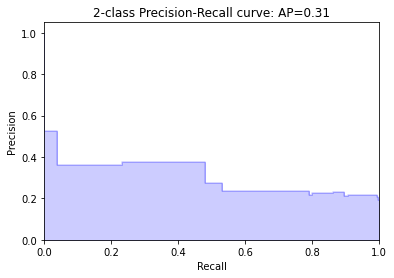

In [24]:
test_probs = model_1.predict_proba(x_test)
plot_pr(y_test, test_probs[:,1])

In [ ]:
importances = model_1.feature_importances_
indices = np.argsort(importances)
f = open("importance_values.txt", 'w')
for i in indices:
    f.write('{0}.{1!s}{2}'.format(i+1, feature_names[i], '\n'))
    print(feature_names[i])
f.close()

# plt.show()